In [5]:

import numpy as np 
data0 = np.loadtxt('./data0.csv',delimiter=',') # load text data as numpy's array type
data1 = np.loadtxt('./data1.csv',delimiter=',') # load text data as numpy's array type
dim = data0.shape[1] 

### add labels on each data, and each array becomes 160x257
data0 = np.hstack([data0, -1*np.ones((data0.shape[0],1))]) # stack arrays in sequence horizontally
data1 = np.hstack([data1, 1*np.ones((data1.shape[0],1))]) # stack arrays in sequence horizontally

### concatenation of data0 and data1 into 'data' and shuffle rows
data = np.random.permutation(np.vstack([data0, data1]))
### initialization of w 
w = np.random.randn(dim) # random initial values with standard normal distribution
# print(w)
ErrorSum = -1. # Sum of errors for all training data (negative value)
j = 0 # number of iteration
while ErrorSum < -0.1: # iterate until the sum of errors (negative) becomes small absolute value enough
    Error = np.zeros(260)
    for i in range(260): # i: 0, 1, ..., 159
        y = w.dot(data[i,0:256])        # output of ANN (inner product of w and input)
        # y = 1 if y > 0 else -1        #追加分。おそらくここで活性化関数をかけ忘れている？
        if y*data[i,256] < 0:         # only if the output is wrong
            w = w + data[i,0:256]*(data[i,256]-y)          # modify the weight
            Error[i] = y*data[i,256] # keep the error value
            # print(i, Error[i])
        ErrorSum = np.sum(Error) # sum of errors
        j = j+1
        print('===', j, 'th loop, Sum of Errors:', ErrorSum)
print('=============================')
print('=== TRAINING HAS FINISHED ===')
print('=============================')
### check the network with test set
Error = 0.0
for i in range(261,320): # i: 261, ..., 320
    #   calculate the output of the neural network by inner product of w and data0[:,i]
    y = w.dot(data[i,0:256]) # output of NN
    if y*data[i,256] < 0: # only if the output is wrong
        Error = Error + 1.0
    # print(i)
ErrorSum = np.sum(Error)
print('\n Error Ratio:', (ErrorSum/60)*100, '%')

=== 1 th loop, Sum of Errors: -6.41355975634607
=== 2 th loop, Sum of Errors: -109.67077240948872
=== 3 th loop, Sum of Errors: -1143.936202260731
=== 4 th loop, Sum of Errors: -19157.48764195152
=== 5 th loop, Sum of Errors: -314352.70972555253
=== 6 th loop, Sum of Errors: -314352.70972555253
=== 7 th loop, Sum of Errors: -314352.70972555253
=== 8 th loop, Sum of Errors: -5655308.08661876
=== 9 th loop, Sum of Errors: -82862692.39088427
=== 10 th loop, Sum of Errors: -675082610.2181977
=== 11 th loop, Sum of Errors: -3820635262.3925705
=== 12 th loop, Sum of Errors: -28858021690.325306
=== 13 th loop, Sum of Errors: -28858021690.325306
=== 14 th loop, Sum of Errors: -410709760221.83624
=== 15 th loop, Sum of Errors: -6845408196061.429
=== 16 th loop, Sum of Errors: -6845408196061.429
=== 17 th loop, Sum of Errors: -6845408196061.429
=== 18 th loop, Sum of Errors: -105117330610233.58
=== 19 th loop, Sum of Errors: -2178673521779915.0
=== 20 th loop, Sum of Errors: -2178673521779915.0


/tmp/ipykernel_725766/3065077911.py:23: RuntimeWarning: invalid value encountered in multiply
  w = w + data[i,0:256]*(data[i,256]-y)          # modify the weight


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 30000 # data size
x_obs = 6*np.random.rand(N)+1
y_obs = x_obs**3 - 12*x_obs**2 +44*x_obs -18 + np.random.randn(N)
# plt.scatter(x_obs, y_obs, marker='.')
D = 1
M = 50
K = 1
a=0.01
# a = 0.005
pSig = 1
W1 = 2*np.random.randn(M, D+1)
W2 = 2*np.random.randn(K, M+1)


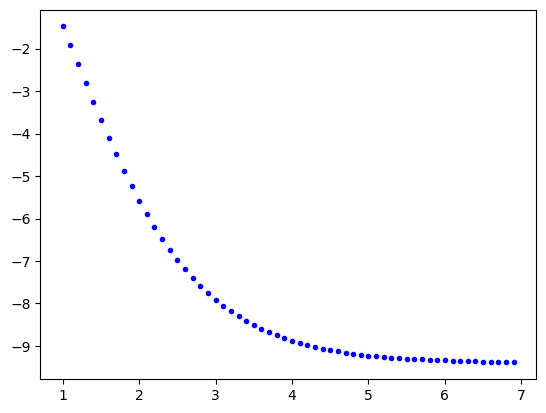

In [ ]:
x_chk = np.arange(1,7,0.1)
# x_chk = np.arange(1,7,0.01)
for ii in range(len(x_chk)):
    x = np.array([x_chk[ii],1]) # add x_0 to x
    x = x[:,np.newaxis] # make x ndarray (D+1 x 1)
    u = np.dot(W1,x) # output of hidden layer (M x 1)
    u = np.vstack((u,1.)) # add u_0 to u
    for jj in range(len(u)):
        u[jj] = 1/(1+np.exp(-pSig*u[jj])) # Sigmoid func.
    y = np.dot(W2,u) # values of output layer (1 x 1)
    plt.scatter(x_chk[ii], y, marker='.', color="b")
plt.show()

In [ ]:
# (4) Train the network
for ii in range(len(x_obs)): # for all data of training set
    t = y_obs[ii] # value for training
    x = np.array([x_obs[ii],1]) # add x_0 to x
    x = x[:,np.newaxis] # make x ndarray (D+1 x 1)
    u = np.dot(W1,x) # output of hidden layer (M x 1)
    u = np.vstack((u,1.)) # add u_0 to u
    for jj in range(len(u)):
        u[jj] = 1/(1+np.exp(-pSig*u[jj])) # Sigmoid func.
    y = np.dot(W2,u) # values of output layer (1 x 1)

    """重み更新は一斉に行うのでW1の更新式に更新後のW2を用いてはいけないので更新前のW2は保存しておく"""
    load_weight = W2
# update W2
    # W2 -= a * (y - t) * u.reshape(-1, 1)
    # print(y.shape)
    # print(t.shape)
    # print(u.shape)
    for kk in range(W2.shape[0]):
        for mm in range(W2.shape[1]):
            W2[kk,mm] = W2[kk,mm] - a*(y-t)*u[mm]

# update W1
    # mm, dd = np.meshgrid(range(W1.shape[0]), range(W1.shape[1]), indexing='ij')
    # sum_k = ((y-t)*load_weight[:,mm]*u[mm]*(1-u[mm])*x[dd]).sum(axis=0)
    # W1 -= a*sum_k

    for mm in range(W1.shape[0]):
        for dd in range(W1.shape[1]):
            sum_k = 0
            for kk in range(K):
                sum_k += (y-t)*load_weight[kk,mm]*u[mm]*(1-u[mm])*x[dd]
                W1[mm,dd] = W1[mm,dd] - a*sum_k

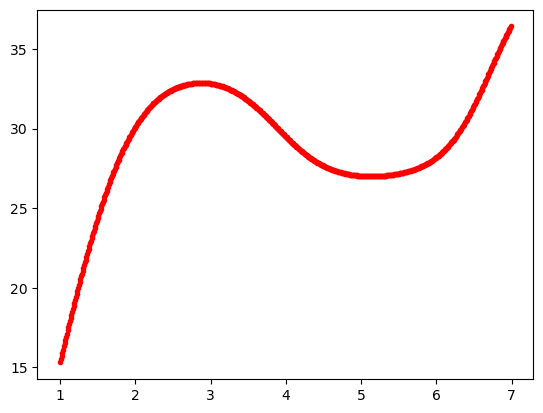

In [ ]:

for ii in range(len(x_chk)):
    x = np.array([x_chk[ii],1]) # add x_0 to x
    x = x[:,np.newaxis] # make x ndarray (D+1 x 1)
    u = np.dot(W1,x) # output of hiddn layer (M x 1)
    u = np.vstack((u,1.)) # add u_0 to u
    for jj in range(len(u)):
        u[jj] = 1/(1+np.exp(-pSig*u[jj])) # Sigmoid func.
        y = np.dot(W2,u) # values of output layer (1 x 1)
    plt.scatter(x_chk[ii], y, marker='.', color="r")
plt.show()